In [1]:
import numpy as np
import pandas as pd 
import sklearn
import seaborn as sns

### Load dataset

In [2]:
real_estate = pd.read_csv('Real Estate.csv')
real_estate.head()

,No,X1 transaction date,X2 house age,X3 distance to the nearest MRT station,X4 number of convenience stores,X5 latitude,X6 longitude,Y house price of unit area
0,1,2012.917,32.0,84.87882,10,24.98298,121.54024,37.9
1,2,2012.917,19.5,306.59470,9,24.98034,121.53951,42.2
2,3,2013.583,13.3,561.98450,5,24.98746,121.54391,47.3
3,4,2013.500,13.3,561.98450,5,24.98746,121.54391,54.8
4,5,2012.833,5.0,390.56840,5,24.97937,121.54245,43.1


In [3]:
real_estate.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 414 entries, 0 to 413
Data columns (total 8 columns):
 #   Column                                  Non-Null Count  Dtype  
---  ------                                  --------------  -----  
 0   No                                      414 non-null    int64  
 1   X1 transaction date                     414 non-null    float64
 2   X2 house age                            414 non-null    float64
 3   X3 distance to the nearest MRT station  414 non-null    float64
 4   X4 number of convenience stores         414 non-null    int64  
 5   X5 latitude                             414 non-null    float64
 6   X6 longitude                            414 non-null    float64
 7   Y house price of unit area              414 non-null    float64
dtypes: float64(6), int64(2)
memory usage: 26.0 KB


In [4]:
real_estate.shape

(414, 8)

### Features in the dataset

In [5]:
real_estate.columns

Index(['No', 'X1 transaction date', 'X2 house age',
       'X3 distance to the nearest MRT station',
       'X4 number of convenience stores', 'X5 latitude', 'X6 longitude',
       'Y house price of unit area'],
      dtype='object')

### Check if  there is missing data

In [6]:
real_estate.isnull().sum()

No                                        0
X1 transaction date                       0
X2 house age                              0
X3 distance to the nearest MRT station    0
X4 number of convenience stores           0
X5 latitude                               0
X6 longitude                              0
Y house price of unit area                0
dtype: int64

### Define X as features

In [7]:
X = real_estate.iloc[:,:7]
X

,No,X1 transaction date,X2 house age,X3 distance to the nearest MRT station,X4 number of convenience stores,X5 latitude,X6 longitude
0,1,2012.917,32.0,84.87882,10,24.98298,121.54024
1,2,2012.917,19.5,306.59470,9,24.98034,121.53951
2,3,2013.583,13.3,561.98450,5,24.98746,121.54391
3,4,2013.500,13.3,561.98450,5,24.98746,121.54391
4,5,2012.833,5.0,390.56840,5,24.97937,121.54245
...,...,...,...,...,...,...,...
409,410,2013.000,13.7,4082.01500,0,24.94155,121.50381
410,411,2012.667,5.6,90.45606,9,24.97433,121.54310
411,412,2013.250,18.8,390.96960,7,24.97923,121.53986
412,413,2013.000,8.1,104.81010,5,24.96674,121.54067


### Define Y as price

In [8]:
y = real_estate.loc[:,'Y house price of unit area']
y

0      37.9
1      42.2
2      47.3
3      54.8
4      43.1
       ... 
409    15.4
410    50.0
411    40.6
412    52.5
413    63.9
Name: Y house price of unit area, Length: 414, dtype: float64

### Train test split

In [9]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,
                                                   y,
                                                    test_size = 0.05,
                                                   random_state = 0)

##  Model Training

### Linear Regression

In [10]:
from sklearn.linear_model import LinearRegression

### Estimator object

In [11]:
lr_classifier = LinearRegression(fit_intercept=True,
                                 normalize=False,
                                 copy_X=True,
                                 n_jobs=None)

### Train model

In [12]:
lr_classifier = lr_classifier.fit(X_train, y_train)
lr_classifier

LinearRegression()

### Apply the model

In [13]:
y_pred = lr_classifier.predict(X_test)
y_pred

array([39.09184855, 12.82614768, 41.76173828, 12.09424855, 41.68156196,
       39.36666405, 40.57898977, 33.8846898 , 50.05358688, 45.550874  ,
       45.51385485, 40.95300388, 38.33135922, 39.89670897, 46.59039145,
       38.21070994, 39.78636257, 40.74697578, 41.30341084, 42.31380145,
       49.36104125])

### Display the coefficients

In [14]:
lr_classifier.coef_

array([-3.28281240e-03,  5.18980590e+00, -2.70389960e-01, -4.34076666e-03,
        1.16918512e+00,  2.26156387e+02, -5.63794054e+00])

## Results
### R2 score of linear regression model

In [15]:
from sklearn import metrics
lr_r2_score = metrics.r2_score(y_test, y_pred)
print('r2 Score:', lr_r2_score)

r2 Score :  0.7065810721724328


### Plot for House Age vs Price

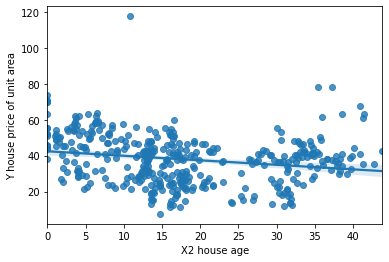

In [16]:
sns.regplot(x=X['X2 house age'], y=y, scatter=True)

### Plot for Distance to MRT station Vs Price

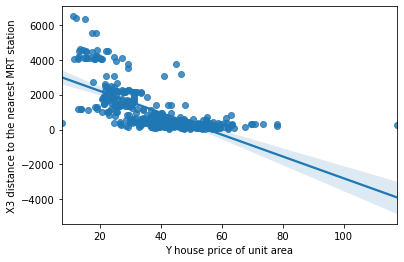

In [17]:
sns.regplot(x=y, y=X['X3 distance to the nearest MRT station'], scatter=True)

### Plot for Number of Convienience Stores Vs Price

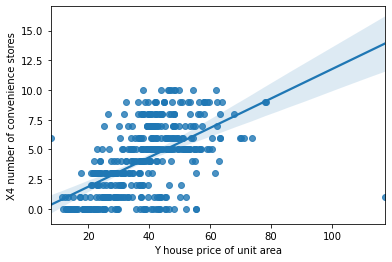

In [18]:
sns.regplot(x=y, y=X['X4 number of convenience stores'], scatter=True)